## Titanic Dataset For Kaggle Competition

In [28]:
import os
import sklearn
import zipfile
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from kaggle.api.kaggle_api_extended import KaggleApi
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import QuantileTransformer, KBinsDiscretizer

In [2]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

### Run The Below Two Cells To Download The Titanic Dataset From Kaggle (Requires API Key)

In [3]:
# !mkdir -p ~/.kaggle
# !mv kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

In [4]:
# api = KaggleApi()
# api.authenticate()

# api.competition_download_files("titanic", path=".", quiet=False)

# # Unzip it
# with zipfile.ZipFile("titanic.zip", "r") as zip_ref:
#     zip_ref.extractall("titanic_data")

# # Remove the zip file
# os.remove("titanic.zip")

In [5]:
train_df = pd.read_csv("titanic_data/train.csv")
test_df = pd.read_csv("titanic_data/test.csv")

In [6]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [11]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [12]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [13]:
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [27]:
train_df['Survived'].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

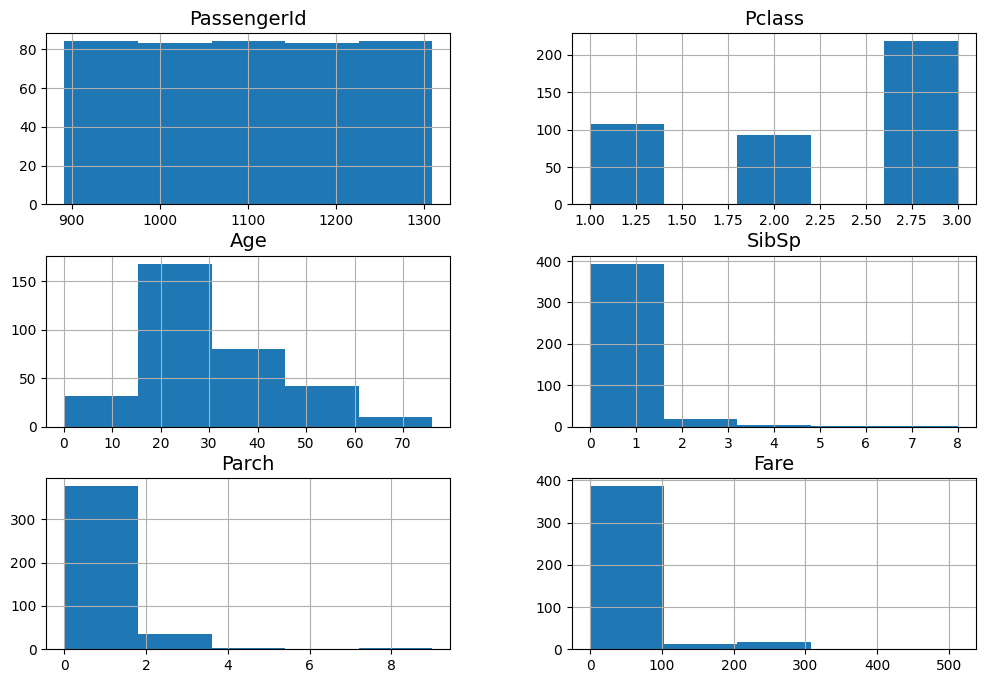

In [14]:
test_df.hist(bins=5, figsize=(12, 8))
plt.show()

In [15]:
corr_matrix = train_df.corr(numeric_only=True)
corr_matrix["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

In [16]:
# --- Define Custom Transformer for Cleaning & Feature Engineering ---

class TitanicPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self):
        self._age_median_map = None
        self._embarked_mode = None

    def fit(self, X: pd.DataFrame, y=None):
        # Compute median Age for each (Pclass, Sex) group
        self._age_median_map = (
            X.groupby(['Pclass', 'Sex'])['Age']
             .median()
             .to_dict()
        )
        # Compute mode of Embarked
        self._embarked_mode = X['Embarked'].mode()[0]
        return self

    def transform(self, X: pd.DataFrame):
        df = X.copy()

        # 1) Impute Age with grouped medians
        def fill_age(row):
            key = (row['Pclass'], row['Sex'])
            return self._age_median_map.get(key, np.nan)
        mask = df['Age'].isna()
        df.loc[mask, 'Age'] = df[mask].apply(fill_age, axis=1)

        # 2) Extract Deck from Cabin, drop Cabin
        df['Deck'] = df['Cabin'].apply(lambda x: x[0] if pd.notna(x) else 'Unknown')
        df.drop(columns=['Cabin'], inplace=True)

        # 3) Impute Embarked with mode
        df['Embarked'] = df['Embarked'].fillna(self._embarked_mode)

        # 4) Map Pclass to categorical labels
        df['Pclass'] = df['Pclass'].map({1: 'Upper', 2: 'Middle', 3: 'Lower'})

        return df

In [17]:
X_train = train_df.drop(columns=['Survived'])
y_train = train_df['Survived']
X_test = test_df

numericFeatures     = ['Age', 'Fare']
familyFeatures      = ['SibSp', 'Parch']
categoricalFeatures = ['Pclass', 'Sex', 'Embarked', 'Deck']

In [18]:
numericPipeline = Pipeline([
    ('powerTransform', PowerTransformer(method='yeo-johnson')),
    ('standardScaler', StandardScaler()),
])

familyPipeline = Pipeline([
    ('bin',
     KBinsDiscretizer(n_bins=3,
                      encode='onehot-dense',
                      strategy='uniform')),
])

full_pipeline = Pipeline([
    ('cleaner', TitanicPreprocessor()),
    ('columnizer', ColumnTransformer(
        transformers=[
            ('cat',
             OneHotEncoder(handle_unknown='ignore', sparse_output=False),
             categoricalFeatures),

            ('num',
             numericPipeline,
             numericFeatures),

            ('family',
             familyPipeline,
             familyFeatures),
        ],
        remainder='drop'
    )),
])

In [19]:
full_pipeline.fit(X_train)

X_train_prepared = full_pipeline.transform(X_train)
X_test_prepared  = full_pipeline.transform(X_test)

In [20]:
ct = full_pipeline.named_steps['columnizer']
featureNames = ct.get_feature_names_out()
dfTrainPrep = pd.DataFrame(X_train_prepared, columns=featureNames, index=X_train.index)
dfTestPrep = pd.DataFrame(X_test_prepared, columns=featureNames, index=X_test.index)

dfTrainPrep.head()

,cat__Pclass_Lower,cat__Pclass_Middle,cat__Pclass_Upper,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S,cat__Deck_A,cat__Deck_B,...,cat__Deck_T,cat__Deck_Unknown,num__Age,num__Fare,family__SibSp_0.0,family__SibSp_1.0,family__SibSp_2.0,family__Parch_0.0,family__Parch_1.0,family__Parch_2.0
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,-0.483206,-0.878820,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.694914,1.336651,1.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,-0.173450,-0.790065,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.484977,1.067352,1.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.484977,-0.774439,1.0,0.0,0.0,1.0,0.0,0.0


In [21]:
dfTrainPrep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cat__Pclass_Lower   891 non-null    float64
 1   cat__Pclass_Middle  891 non-null    float64
 2   cat__Pclass_Upper   891 non-null    float64
 3   cat__Sex_female     891 non-null    float64
 4   cat__Sex_male       891 non-null    float64
 5   cat__Embarked_C     891 non-null    float64
 6   cat__Embarked_Q     891 non-null    float64
 7   cat__Embarked_S     891 non-null    float64
 8   cat__Deck_A         891 non-null    float64
 9   cat__Deck_B         891 non-null    float64
 10  cat__Deck_C         891 non-null    float64
 11  cat__Deck_D         891 non-null    float64
 12  cat__Deck_E         891 non-null    float64
 13  cat__Deck_F         891 non-null    float64
 14  cat__Deck_G         891 non-null    float64
 15  cat__Deck_T         891 non-null    float64
 16  cat__Dec

In [22]:
dfTestPrep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cat__Pclass_Lower   418 non-null    float64
 1   cat__Pclass_Middle  418 non-null    float64
 2   cat__Pclass_Upper   418 non-null    float64
 3   cat__Sex_female     418 non-null    float64
 4   cat__Sex_male       418 non-null    float64
 5   cat__Embarked_C     418 non-null    float64
 6   cat__Embarked_Q     418 non-null    float64
 7   cat__Embarked_S     418 non-null    float64
 8   cat__Deck_A         418 non-null    float64
 9   cat__Deck_B         418 non-null    float64
 10  cat__Deck_C         418 non-null    float64
 11  cat__Deck_D         418 non-null    float64
 12  cat__Deck_E         418 non-null    float64
 13  cat__Deck_F         418 non-null    float64
 14  cat__Deck_G         418 non-null    float64
 15  cat__Deck_T         418 non-null    float64
 16  cat__Dec

In [23]:
dfTrainPrep.describe()

,cat__Pclass_Lower,cat__Pclass_Middle,cat__Pclass_Upper,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S,cat__Deck_A,cat__Deck_B,...,cat__Deck_T,cat__Deck_Unknown,num__Age,num__Fare,family__SibSp_0.0,family__SibSp_1.0,family__SibSp_2.0,family__Parch_0.0,family__Parch_1.0,family__Parch_2.0
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,...,891.000000,891.000000,8.910000e+02,8.910000e+02,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.551066,0.206510,0.242424,0.352413,0.647587,0.188552,0.086420,0.725028,0.016835,0.052750,...,0.001122,0.771044,-7.974666e-18,-1.644775e-17,0.948373,0.043771,0.007856,0.893378,0.095398,0.011223
std,0.497665,0.405028,0.428790,0.477990,0.477990,0.391372,0.281141,0.446751,0.128725,0.223659,...,0.033501,0.420397,1.000562e+00,1.000562e+00,0.221398,0.204700,0.088337,0.308805,0.293929,0.105403
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-2.605302e+00,-3.534079e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,-5.228339e-01,-7.919073e-01,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,-1.734496e-01,-1.891020e-01,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,5.554238e-01,5.594584e-01,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,3.326346e+00,2.971192e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


          mean  count
Deck                 
D     0.757576     33
E     0.750000     32
B     0.744681     47
F     0.615385     13
C     0.593220     59
G     0.500000      4
A     0.466667     15
U     0.299854    687
T     0.000000      1


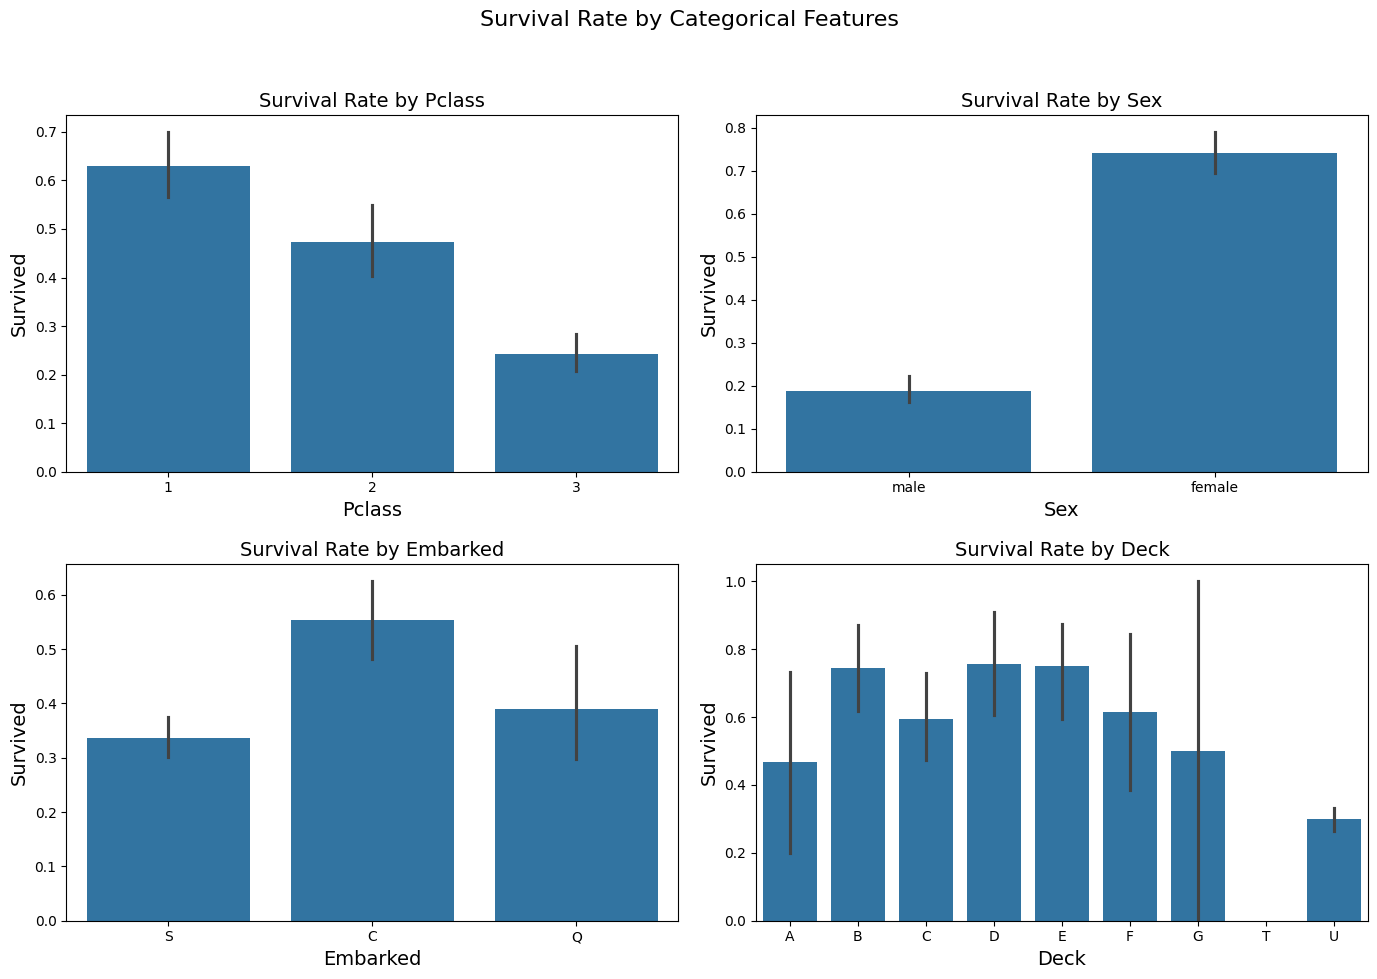

In [33]:
train_dfC = train_df.copy()

if 'Deck' not in train_dfC.columns:
    train_dfC['Deck'] = train_dfC['Cabin'].fillna('U').str[0]

deckSurvival = train_dfC.groupby('Deck')['Survived'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)
print(deckSurvival)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Survival Rate by Categorical Features', fontsize=16)

# Plot 1: Pclass
sns.barplot(data=train_dfC, x='Pclass', y='Survived', ax=axes[0, 0])
axes[0, 0].set_title('Survival Rate by Pclass')

# Plot 2: Sex
sns.barplot(data=train_dfC, x='Sex', y='Survived', ax=axes[0, 1])
axes[0, 1].set_title('Survival Rate by Sex')

# Plot 3: Embarked
sns.barplot(data=train_dfC, x='Embarked', y='Survived', ax=axes[1, 0])
axes[1, 0].set_title('Survival Rate by Embarked')

# Plot 4: Deck
sns.barplot(data=train_dfC, x='Deck', y='Survived', ax=axes[1, 1],
            order=sorted(train_dfC['Deck'].unique()))
axes[1, 1].set_title('Survival Rate by Deck')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

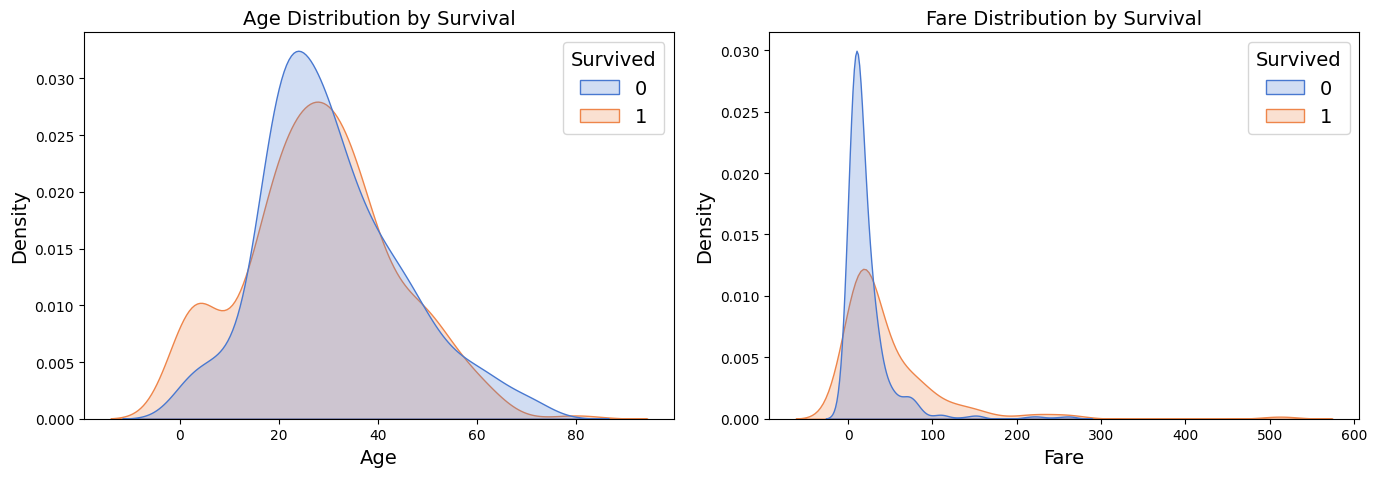

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Age distribution
sns.kdeplot(
    data=train_df,
    x='Age',
    hue='Survived',
    common_norm=False,
    fill=True,
    palette='muted',
    ax=axes[0]
)
axes[0].set_title('Age Distribution by Survival')
axes[0].set_xlabel('Age')

# Fare distribution
sns.kdeplot(
    data=train_df,
    x='Fare',
    hue='Survived',
    common_norm=False,
    fill=True,
    palette='muted',
    ax=axes[1]
)
axes[1].set_title('Fare Distribution by Survival')
axes[1].set_xlabel('Fare')

plt.tight_layout()
plt.show()

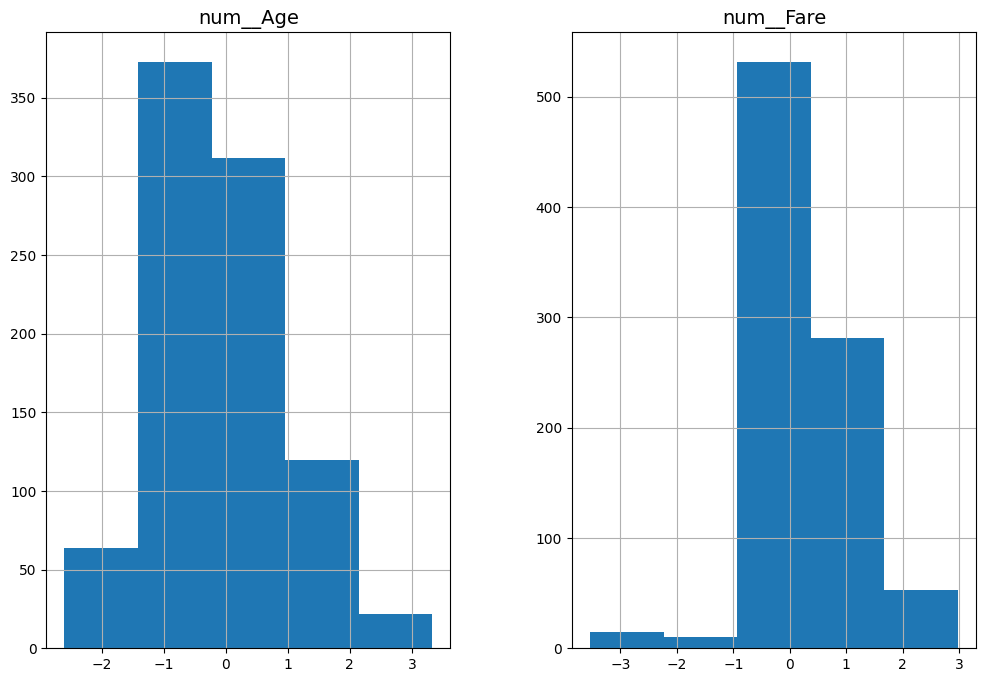

In [24]:
dfTrainPrep.iloc[:, 17:19].hist(bins=5, figsize=(12, 8))
plt.show()

In [25]:
modelPipeline = Pipeline([
    ('preprocessor', full_pipeline),
    ('classifier', RandomForestClassifier(random_state=42))
])

modelPipeline.fit(X_train, y_train)
preds = modelPipeline.predict(X_test)

In [26]:
submission_df = pd.DataFrame({
    'PassengerId': X_test['PassengerId'],
    'Survived': preds
})

submission_df.to_csv('submission.csv', index=False)

print("Submission file created successfully!")
print(submission_df.head())

Submission file created successfully!
   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         1
4          896         0
